Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Sympy Neural Network Demo

In [1]:
from itertools import count
import numpy as np
import sympy
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

In [3]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

## Simple, 1-feature Problem

### Dataset

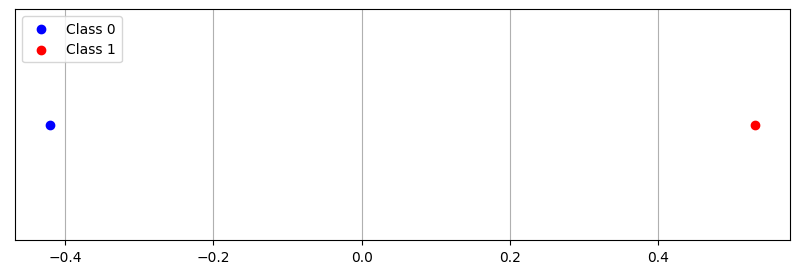

In [4]:
POINTS = 1
SCALE = 0.5

class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=POINTS), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=POINTS), decimals=2)
plt.figure(figsize=(10, 3))
plt.scatter(x=class0, y=np.zeros(POINTS), c="blue", label="Class 0")
plt.scatter(x=class1, y=np.zeros(POINTS), c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid(axis="x")
plt.gca().get_yaxis().set_visible(False)

## The Neural Network

A kind of good old *perceptron* using a sigmoid

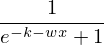

In [5]:
x_, k_, w_ = sympy.symbols("x k w")
val = w_ * x_ + k_
nn = sigmoid(val)
nn

Now pick a *loss function* and use it to calculate the actual loss

In [6]:
def loss_function(v, e):
    return (v - e) ** 2

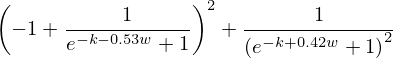

In [7]:
loss = 0
for x in class0:
    loss = loss + loss_function(nn.subs(x_, x), 0)
for x in class1:
    loss = loss + loss_function(nn.subs(x_, x), 1)

loss

Plot the loss as a function of *k* and *w*

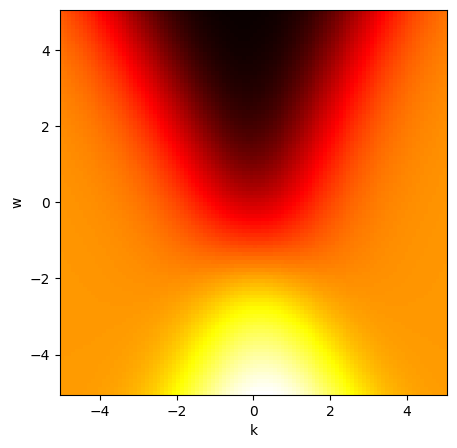

In [8]:
RANGE = 5
plt.figure(figsize=(5, 5))
t = np.linspace(-RANGE, RANGE, 100)
K, W = np.meshgrid(t, t)
loss_f = sympy.lambdify((k_, w_), loss)
plt.xlabel("k")
plt.ylabel("w")
plt.pcolormesh(K, W, loss_f(K, W), cmap="hot")
None

### Train

That is, minimize the loss through simple gradient descent

In [9]:
grad = sympy.derive_by_array(loss, (k_, w_))
grad_f = sympy.lambdify((k_, w_), grad)

 1: [-0.55136901 10.26479989] -> loss = 0.000114690716785017 / grad = [ 5.93793921e-06 -1.07804293e-04]
 2: [-0.55136377 10.26470464] -> loss = 0.00011470101597662406 / grad = [ 5.93847080e-06 -1.07813937e-04]
 3: [-0.55141221 10.2655842 ] -> loss = 0.00011460593949819153 / grad = [ 5.93356347e-06 -1.07724910e-04]


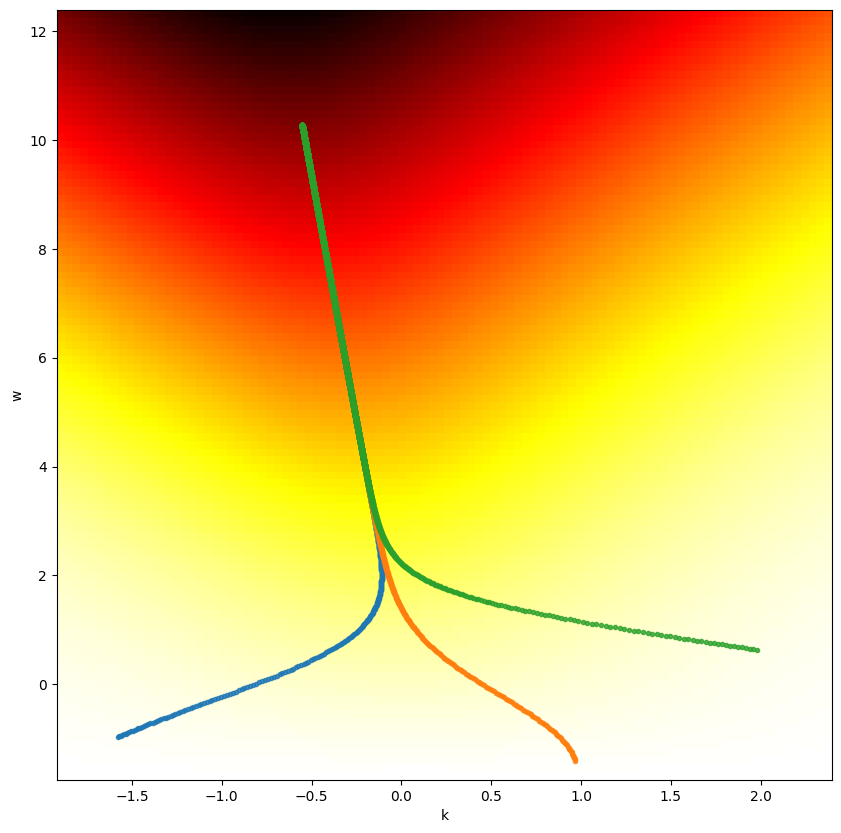

In [10]:
LEARNING_RATE = 0.1

minx, miny = 0, 0
maxx, maxy = 0, 0
paths = list()
for lines in range(3):
    points = [np.random.random(2) * RANGE - RANGE / 2]
    for step in range(100_000):
        p = points[-1]
        minx, miny = min(minx, p[0]), min(miny, p[1])
        maxx, maxy = max(maxx, p[0]), max(maxy, p[1])
        l = np.array(loss_f(*p))
        g = np.array(grad_f(*p))
        points.append(p - LEARNING_RATE * g)
    paths.append(np.array(points))
    print(f"{lines+1:2d}: {np.array(p)} -> loss = {l} / grad = {g}")

plt.figure(figsize=(10, 10))
x = np.linspace(minx * 1.2, maxx * 1.2, 100)
y = np.linspace(miny * 1.2, maxy * 1.2, 100)
X, Y = np.meshgrid(x, y)
plt.pcolormesh(X, Y, np.log(loss_f(X, Y)), cmap="hot")
for p in paths:
    plt.scatter(x=p[:, 0], y=p[:, 1], color=None, marker=".", alpha=0.8)

plt.xlabel("k")
plt.ylabel("w")
None

### The *trained* network

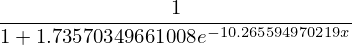

In [11]:
nn_fitted = nn.subs([(k_, paths[-1][-1][0]), (w_, paths[-1][-1][1])])
nn_fitted_f = sympy.lambdify(x_, nn_fitted)

nn_fitted

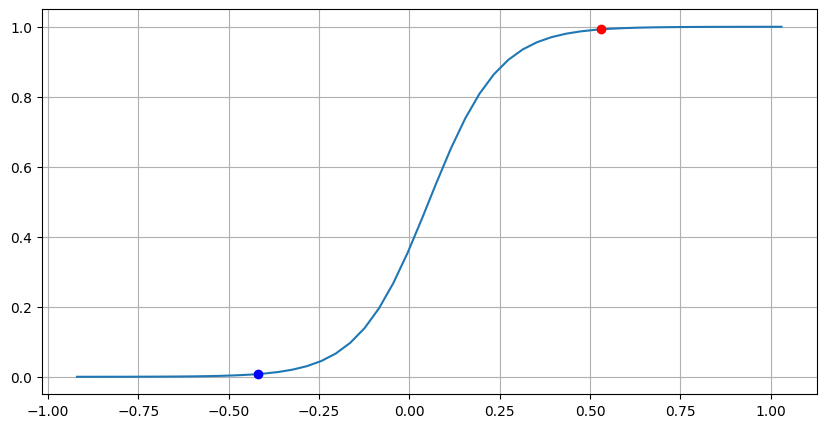

In [12]:
x = np.linspace(min(class0.min(), class1.min()) - 0.5, max(class0.max(), class1.max()) + 0.5)
plt.figure(figsize=(10, 5))
plt.plot(x, nn_fitted_f(x))
for p in class0:
    plt.plot(p, nn_fitted_f(p), marker="o", color="blue")
for p in class1:
    plt.plot(p, nn_fitted_f(p), marker="o", color="red")
plt.grid()
None

## Simple, 2-feature Problem, Single Neuron

### Dataset

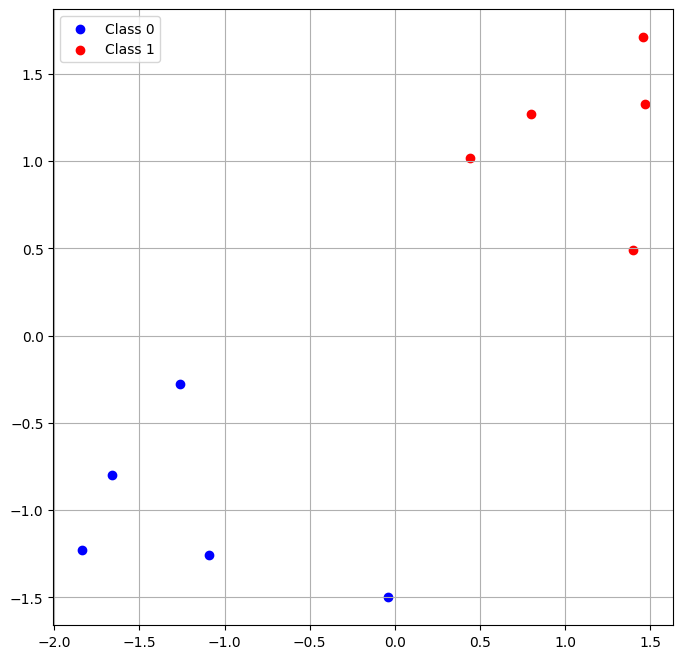

In [13]:
POINTS = 10
SCALE = 0.5
class0 = np.around(np.random.normal(loc=-1, scale=SCALE, size=(POINTS // 2, 2)), decimals=2)
class1 = np.around(np.random.normal(loc=1, scale=SCALE, size=(POINTS // 2, 2)), decimals=2)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend(loc="upper left")
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## The Neural Network

Yet again *perceptron*-like

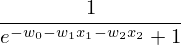

In [14]:
X1, X2, W0, W1, W2 = sympy.symbols("x_1 x_2 w_0 w_1 w_2")
p1 = W0 + W1 * X1 + W2 * X2
nn = 1 / (1 + sympy.exp(-p1))
nn

Let's use a better *loss function* and use it to calculate the actual loss

In [15]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


# Alt: return -(e * sympy.log(v) + (1 - e) * sympy.log(1 - v))

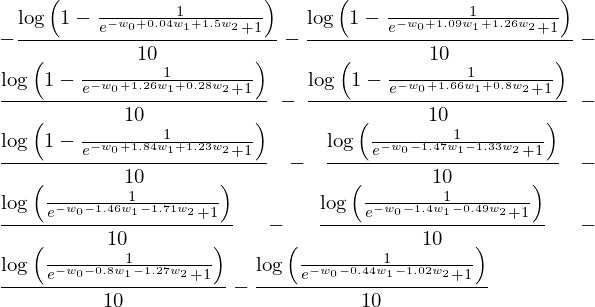

In [16]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
loss_f = sympy.lambdify((W0, W1, W2), loss)
loss

### Train

Minimize the loss using a smarter function from scipy

In [17]:
start = np.random.random(3) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [1.34937454 6.91771655 8.30683854]


### The *trained* network

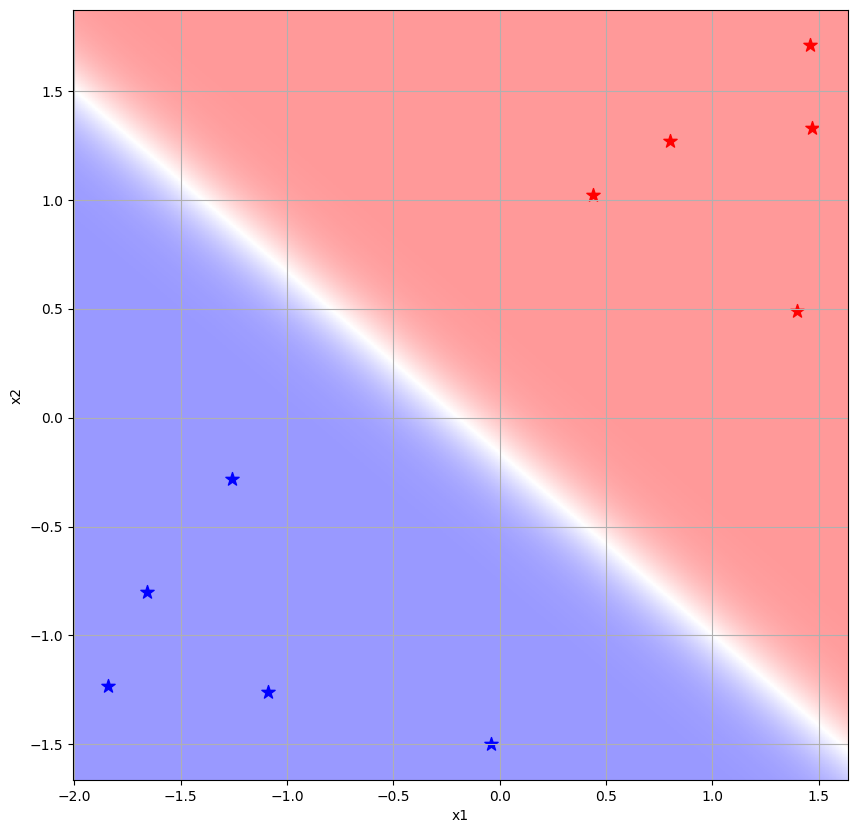

In [18]:
w0, w1, w2 = fit.x
nn_f = sympy.lambdify((X1, X2), nn.subs([(W0, w0), (W1, w1), (W2, w2)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")

None

## More complex, 2-feature Problem

### Dataset

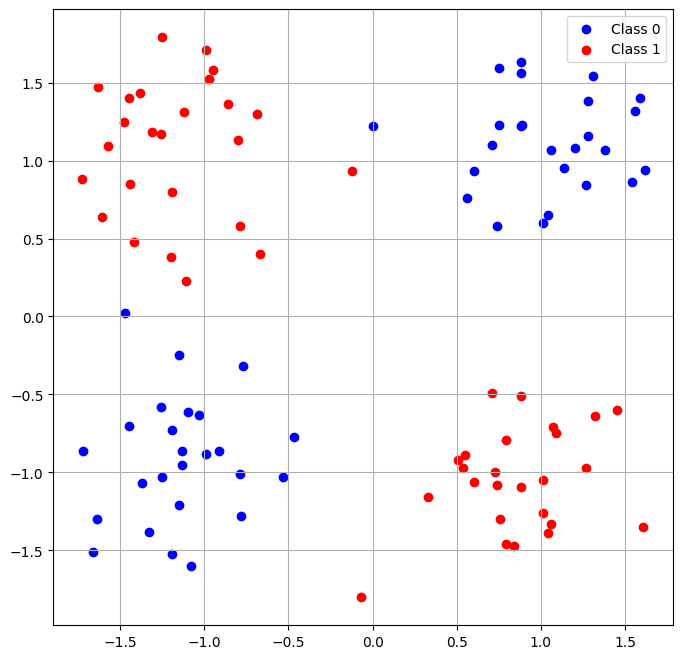

In [19]:
POINTS = 100
SCALE = 0.4
class0 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, -1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, 1],
        ]
    ),
    decimals=2,
)
class1 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, 1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, -1],
        ]
    ),
    decimals=2,
)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend()
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## The Neural Network

A *multilayer perceptron* with one hidden layer

In [20]:
X1, X2 = sympy.symbols("x_1 x_2")
WEIGHT = (sympy.symbols(f"w{t}") for t in count(0))

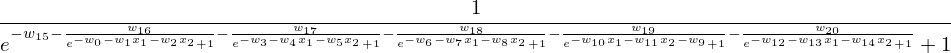

In [21]:
hidden = list()
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))
hidden.append(sigmoid(next(WEIGHT) + X1 * next(WEIGHT) + X2 * next(WEIGHT)))

nn = next(WEIGHT)
for p in hidden:
    nn += next(WEIGHT) * p
nn = sigmoid(nn)
nn

Calculate the actual loss

In [22]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Weights: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Weights: [w0, w1, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w2, w20, w3, w4, w5, w6, w7, w8, w9]


### Train

Minimize the loss using a smarter function from scipy

In [23]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [-14.10900756 -13.40670194  17.80184399  -9.67814938 -80.10317495
  78.66800568 -88.27034785  19.05407803 -50.51719552  -9.42188068
 -48.8581786   13.31548528 -39.79705899  86.44690692  -1.77547259
  11.73164353  15.62061153 -56.61608158 175.40573042  47.61475662
 -20.12635775]


### The *trained* network

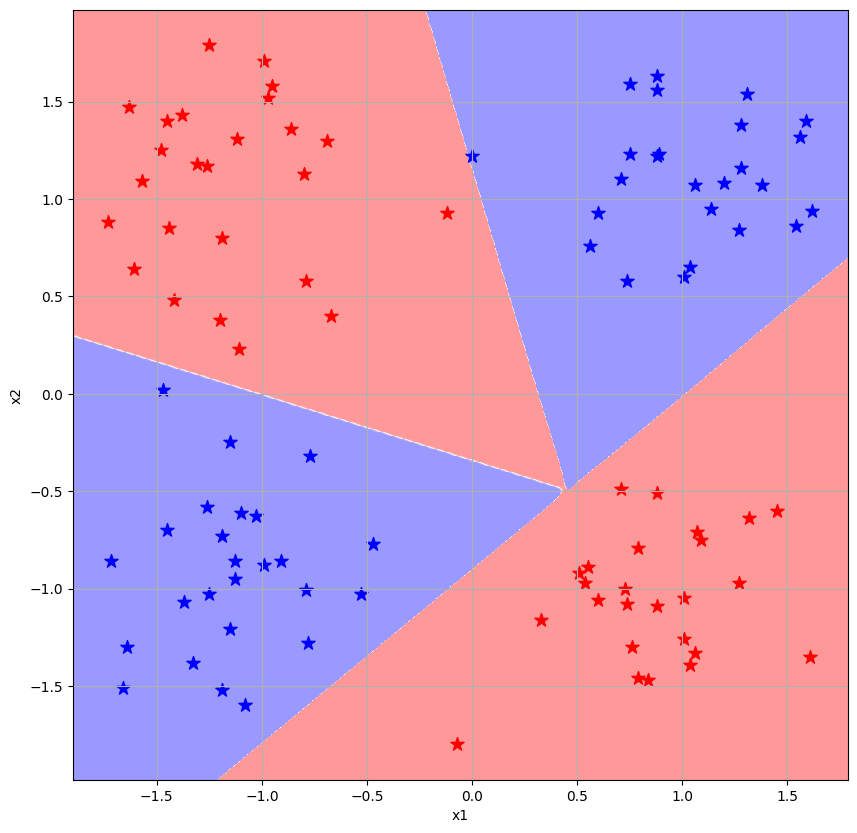

In [24]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")
None

## The Neural Network (alternative)

Again, one single neuron, but with extra inputs

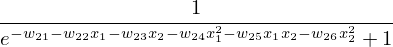

In [25]:
nn = sigmoid(
    next(WEIGHT)
    + next(WEIGHT) * X1
    + next(WEIGHT) * X2
    + next(WEIGHT) * X1**2
    + next(WEIGHT) * X1 * X2
    + next(WEIGHT) * X2**2
)
nn

Calculate the actual loss

In [26]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)


loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Weights: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Weights: [w21, w22, w23, w24, w25, w26]


### Train

Minimize the loss using a smarter function from scipy

In [29]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [  15.05922078   22.51036342  -32.67267613    1.2367209  -125.46479422
   12.06559484]


### The *trained* network

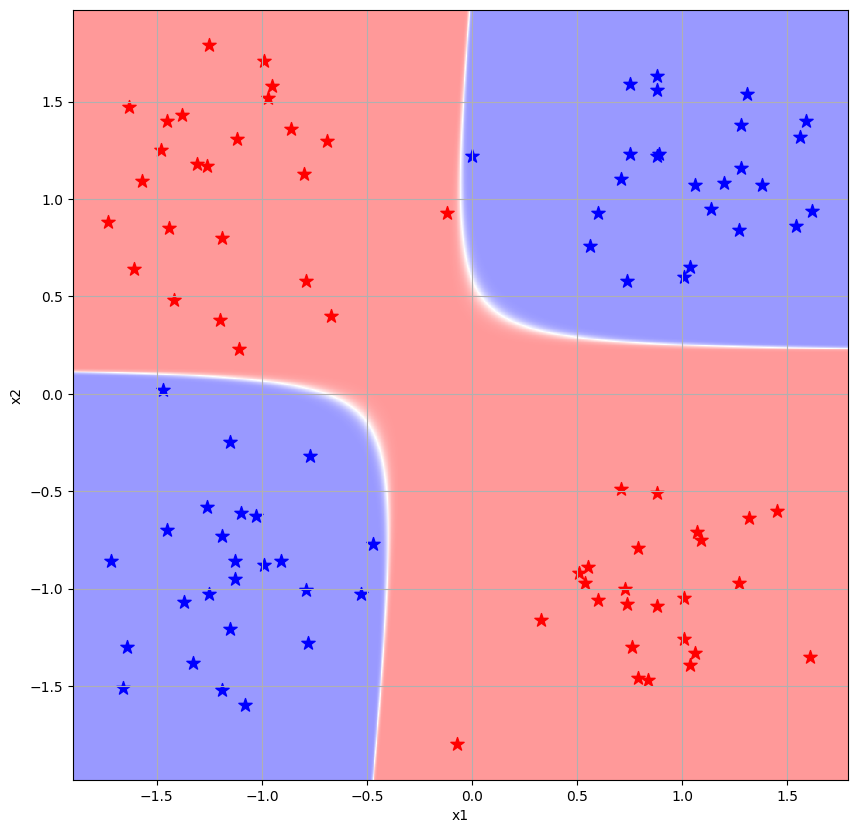

In [30]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")
None